## Wstęp

Netflix - to jedna z największych platform oferująca dostęp do filmów i seriali online. W Polsce wystartował jesienią 2016 roku. Użytkownicy mogą oglądać bez ograniczeń swoje ulubione programy na telefonie, tablecie, laptopie i telewizorze. Za korzystanie z usług jest pobierana miesięczna opłata.

## Wstępne przetwarzanie danych

#### Importowanie bibliotek

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#### Pobranie danych

In [5]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [7]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Określenie unikalnych wartości każdej kolumny

In [8]:
unique_values_count = df.nunique()
unique_values_count_table = unique_values_count.reset_index()
unique_values_count_table.columns = ['Column', 'Unique Values Count']
print(unique_values_count_table)

          Column  Unique Values Count
0        show_id                 8809
1           type                    2
2          title                 8806
3       director                 4529
4           cast                 7694
5        country                  748
6     date_added                 1768
7   release_year                   75
8         rating                   18
9       duration                  220
10     listed_in                  516
11   description                 8777
12   Unnamed: 12                    0
13   Unnamed: 13                    0
14   Unnamed: 14                    0
15   Unnamed: 15                    0
16   Unnamed: 16                    0
17   Unnamed: 17                    0
18   Unnamed: 18                    0
19   Unnamed: 19                    0
20   Unnamed: 20                    0
21   Unnamed: 21                    0
22   Unnamed: 22                    0
23   Unnamed: 23                    0
24   Unnamed: 24                    0
25   Unnamed

#### Określenie pustych wartości 

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [10]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.9%
cast null rate: 9.37%
country null rate: 9.43%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%
Unnamed: 12 null rate: 100.0%
Unnamed: 13 null rate: 100.0%
Unnamed: 14 null rate: 100.0%
Unnamed: 15 null rate: 100.0%
Unnamed: 16 null rate: 100.0%
Unnamed: 17 null rate: 100.0%
Unnamed: 18 null rate: 100.0%
Unnamed: 19 null rate: 100.0%
Unnamed: 20 null rate: 100.0%
Unnamed: 21 null rate: 100.0%
Unnamed: 22 null rate: 100.0%
Unnamed: 23 null rate: 100.0%
Unnamed: 24 null rate: 100.0%
Unnamed: 25 null rate: 100.0%


#### Porządkowanie brakujących wartości

In [11]:
df = df[df.columns[:12]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [12]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Unknown', inplace=True)

In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    8809 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8809 non-null   object
 9   duration      8809 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Wizualizacja

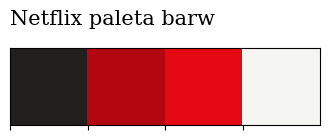

In [20]:
# Ustalenie palety barw
import seaborn as sns
netflix_colors = sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix paleta barw",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [15]:
df['type'].value_counts()

type
Movie      6132
TV Show    2677
Name: count, dtype: int64

In [22]:
plt.figure(figsize=(8, 8))
df['type'].value_counts().plot.pie(
    autopct="%1.2f%%",
    explode=[0, 0.08, 0], 
    shadow=True,
    colors=netflix_colors[:df['type'].nunique()]
)

TypeError: 'NoneType' object is not subscriptable

<Figure size 800x800 with 0 Axes>